In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from idlescape import *
try:
    from ipywidgets import interact, widgets
except ImportError:
    %pip install ipywidgets
    from ipywidgets import interact, widgets

locationFile = "data/locations.json"
itemFile = "data/items.json"
player = Character(
    datafile=itemFile,
    fishing_level=72,
    fishing_bonus=18,
    fishing_set_bonus=0.0,
    bait_power=55.5,
    reel_power=47+15,
    bonus_rarity=21,
    mining_level=86,
    mining_set_bonus=0.25,
    mining_bonus=59,
    foraging_level=82,
    foraging_bonus=59,
    foraging_set_bonus=0.0,
    )
fishing = Fishing(player, locationFile);
mining = Mining(player, locationFile);
foraging = Foraging(player, locationFile);

In [2]:
interact(lambda x: setattr( player, 'fishing_level', x ), 
         x=widgets.IntSlider(min=1, max=200, value=player.fishing_level, description='Fishing Level'))
interact(lambda x: setattr( player, 'mining_level', x ), 
         x=widgets.IntSlider(min=1, max=200, value=player.mining_level, description='Mining Level'))
interact(lambda x: setattr( player, 'foraging_level', x ), 
         x=widgets.IntSlider(min=1, max=200, value=player.foraging_level, description='Foraging Level'))

interactive(children=(IntSlider(value=72, description='Fishing Level', max=200, min=1), Output()), _dom_classe…

interactive(children=(IntSlider(value=86, description='Mining Level', max=200, min=1), Output()), _dom_classes…

interactive(children=(IntSlider(value=82, description='Foraging Level', max=200, min=1), Output()), _dom_class…

<function __main__.<lambda>(x)>

,Clay Pit,City Outskirts Mine,Village Quarry,Desert Mine,Underground Mine,Hidden Mine,Volcano Mine,Slate Spires,Deep Pit
Clay,737.8,230.6,0.0,33.0,0.0,0.0,0.0,0.0,0.0
Copper Ore,368.9,345.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tin Ore,368.9,345.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stone,184.5,230.6,720.5,0.0,77.6,93.2,0.0,285.2,0.0
Sand,276.7,230.6,0.0,366.2,0.0,0.0,0.0,285.2,0.0
Fat Nightcrawler Bait,18.4,11.5,11.5,0.0,0.0,0.0,0.0,0.0,0.0
Iron Ore,0.0,57.6,576.4,65.9,38.8,0.0,0.0,0.0,0.0
Coal,0.0,57.6,432.3,73.2,38.8,0.0,0.0,0.0,0.0
Mithril Ore,0.0,0.0,0.0,146.5,232.9,62.1,124.2,0.0,0.0
Silver,0.0,0.0,0.0,146.5,97.0,124.2,124.2,0.0,0.0


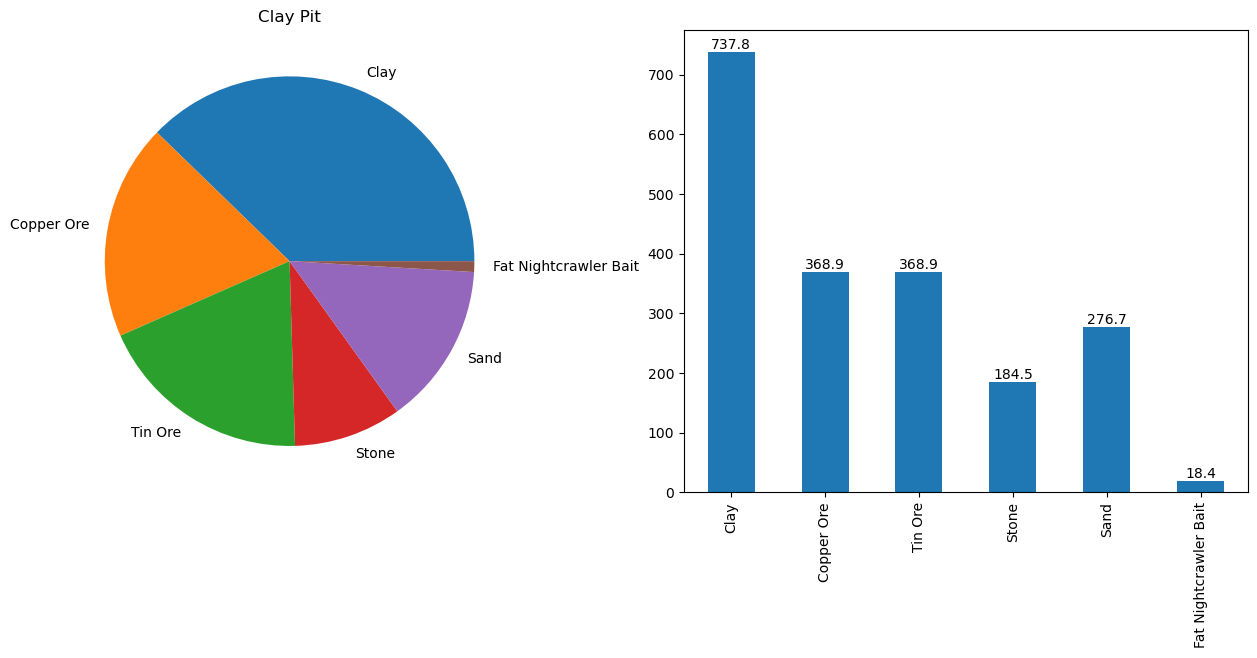

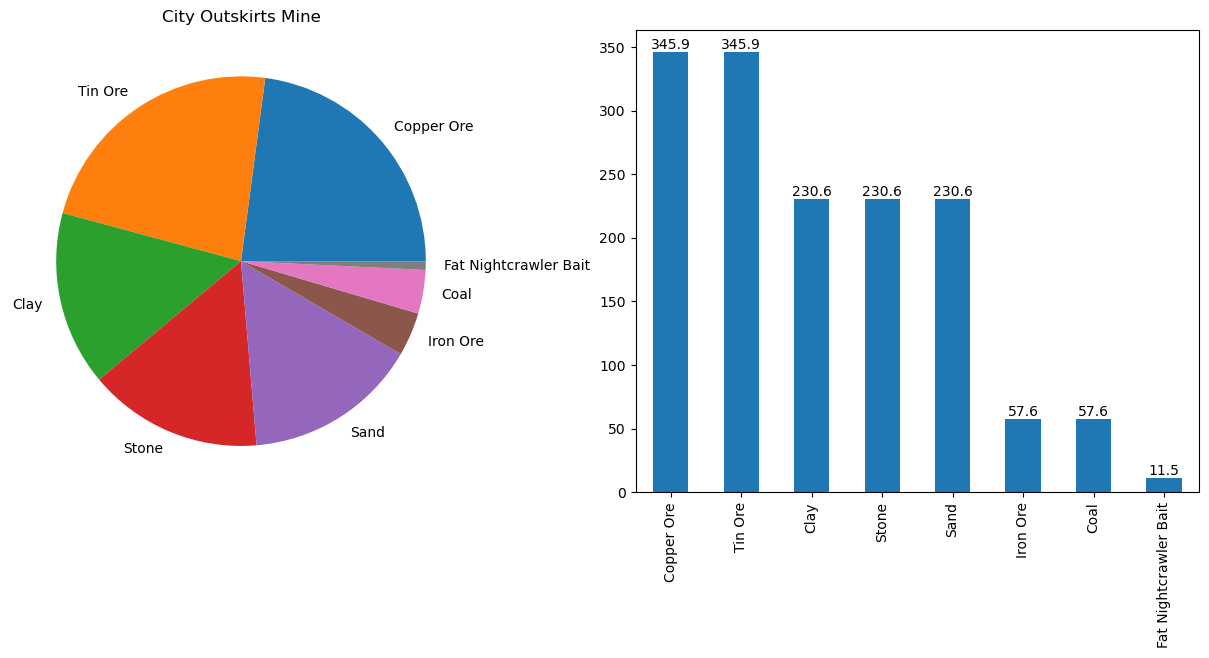

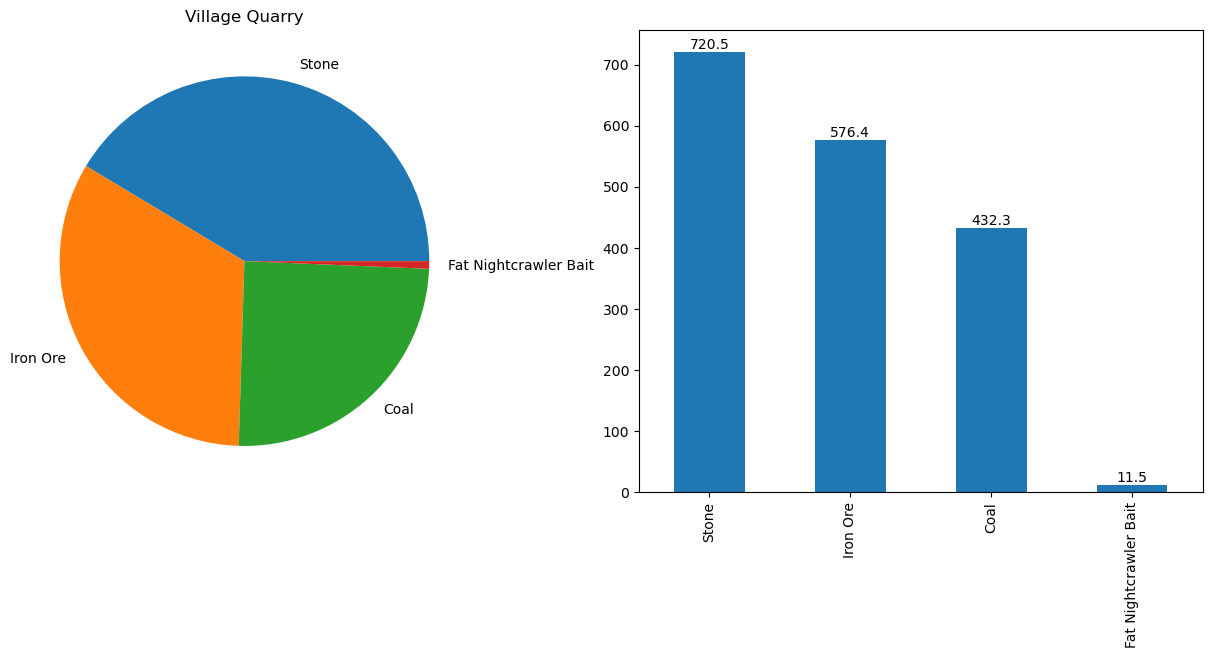

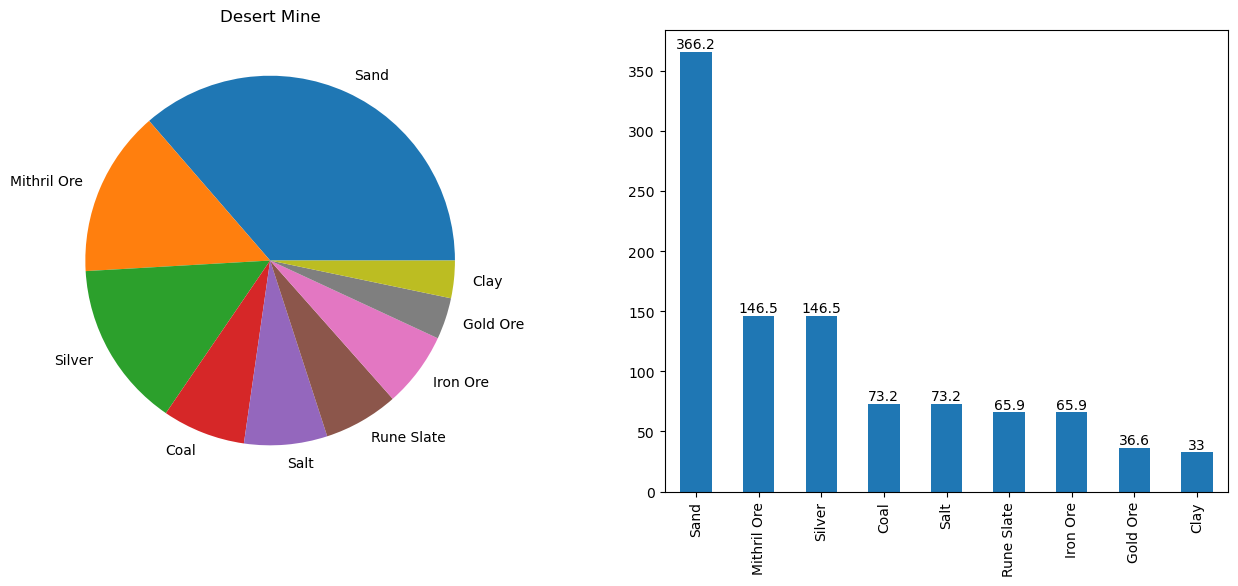

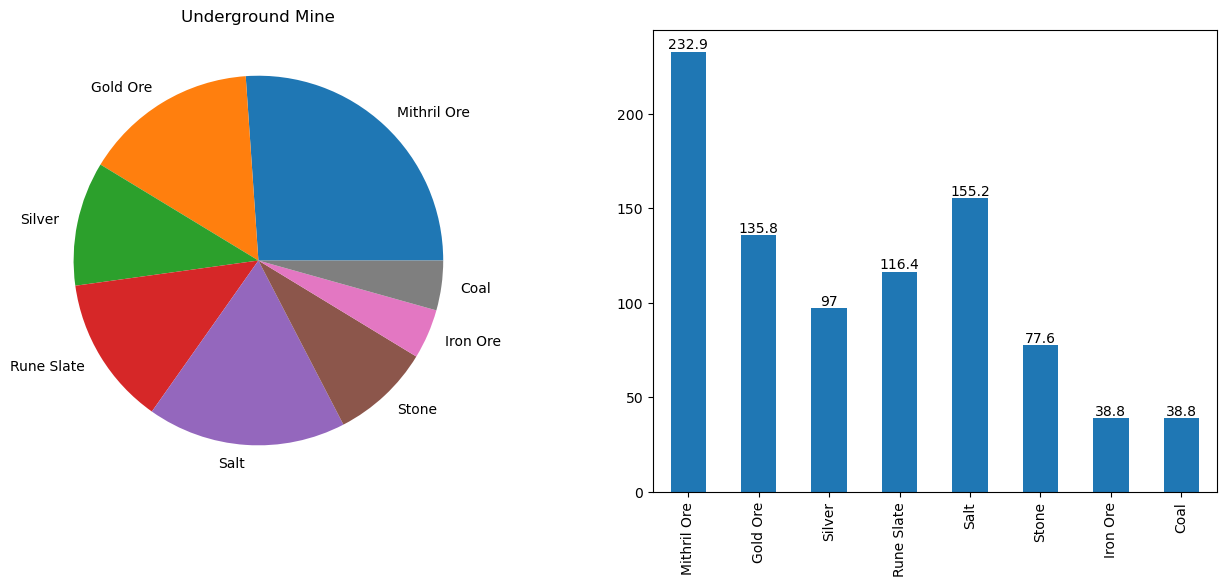

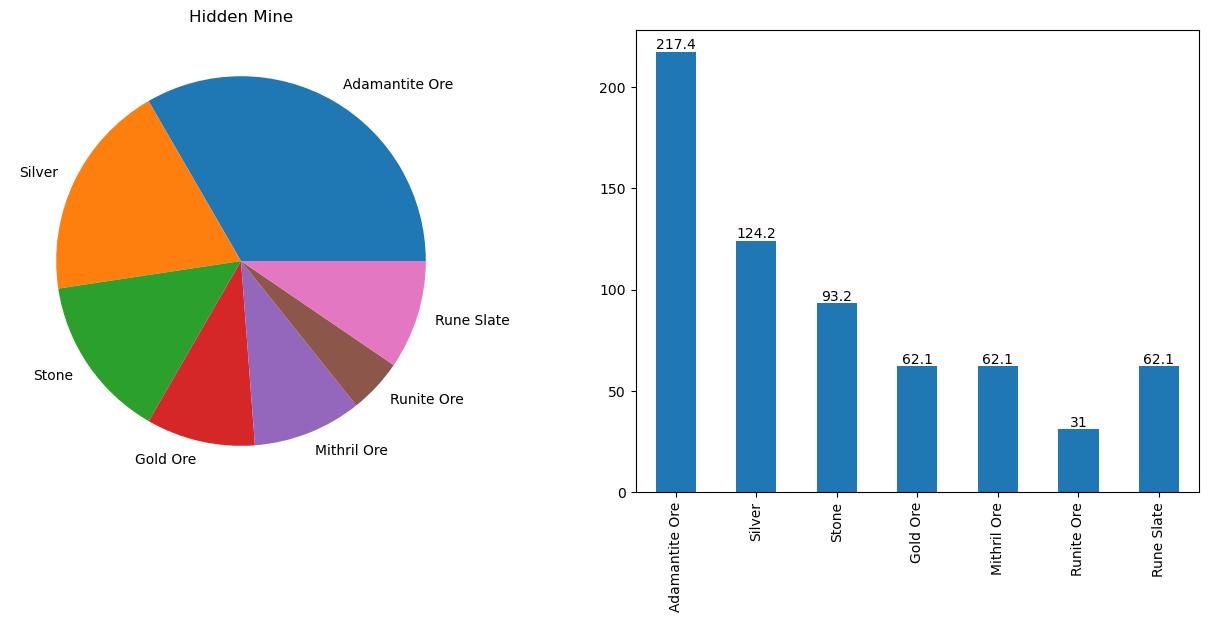

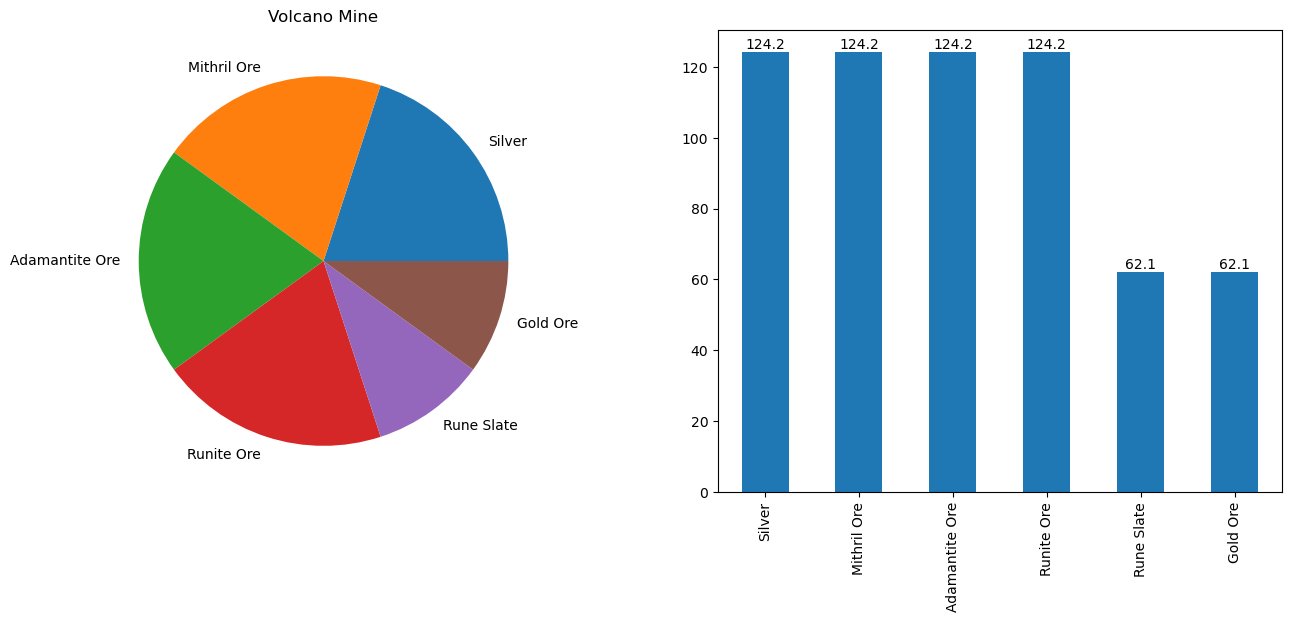

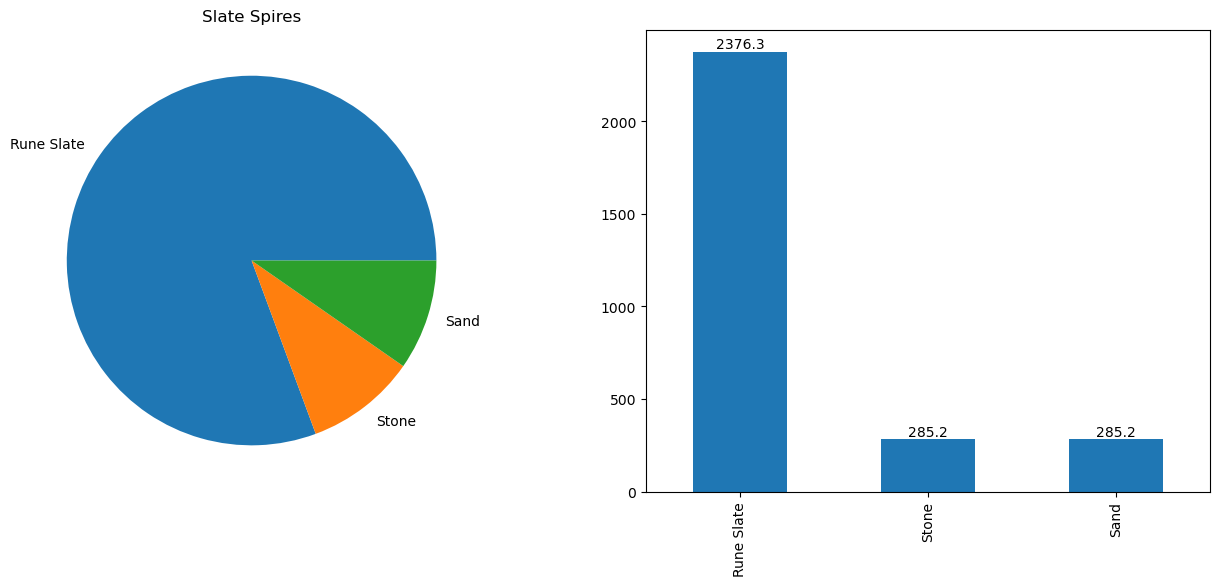

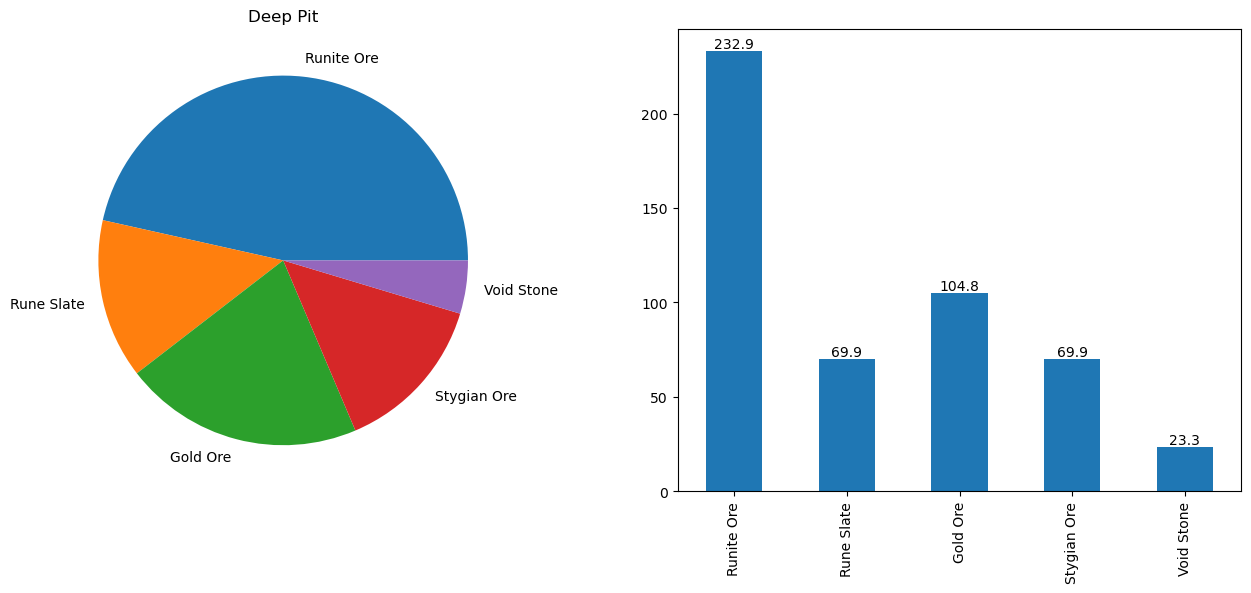

In [3]:
def zone_summary(action, zone):
    item_series = action.location_item_histogram(zone, interval='hour').round(1)
    fig_size = (16, 6)
    if( item_series.sum() > 0 ):
        fig, axs = plt.subplots(1,2, figsize=(16,6))
        axs[0].set_title(zone)
        item_series.plot.pie(ax=axs[0])
        item_series.plot.bar(ax=axs[1])
        axs[1].bar_label(axs[1].containers[0])
    return item_series
        
def action_summary(action, **kwargs):
    series_list = []
    indices = action.list_of_actions()
    for action_name in indices:
        series_list.append(zone_summary(action, action_name))
    df = pd.DataFrame(series_list, index=indices).fillna(0)
    display(df.transpose())
        
action_summary(mining)

,Grasslands,Verdant Valley,Fungal Grotto,The Tangle,Misty Marsh,Frozen Tundra,Haunted Woods,Living Forest
Carrot Seed,27.0,18.4,74.8,0.0,0.0,0.0,0.0,0.0
Honey,31.8,90.1,0.0,0.0,0.0,0.0,0.0,17.6
Carrot,12.5,7.5,106.2,0.0,0.0,0.0,0.0,0.0
Potato,12.5,0.0,106.2,0.0,13.3,0.0,0.0,0.0
Potato Seed,22.0,0.0,74.8,0.0,30.6,0.0,0.0,0.0
Wildberry,45.4,0.0,0.0,0.0,0.0,56.5,0.0,0.0
Wildberry Bush Seed,22.2,0.0,0.0,0.0,0.0,14.1,0.0,0.0
Branch,1271.8,808.4,297.2,137.4,0.0,0.0,0.0,0.0
Log,635.9,219.8,0.0,137.4,0.0,0.0,0.0,0.0
Glowbug Bait,50.6,36.8,31.1,4.6,2.5,0.0,0.0,0.0


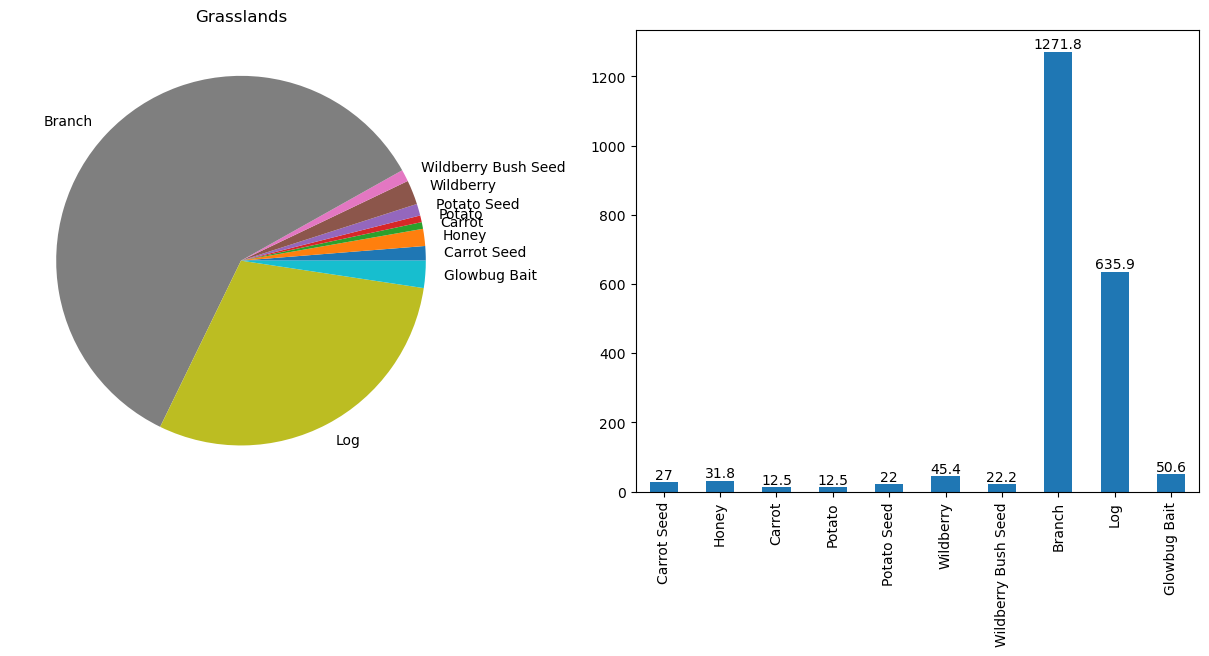

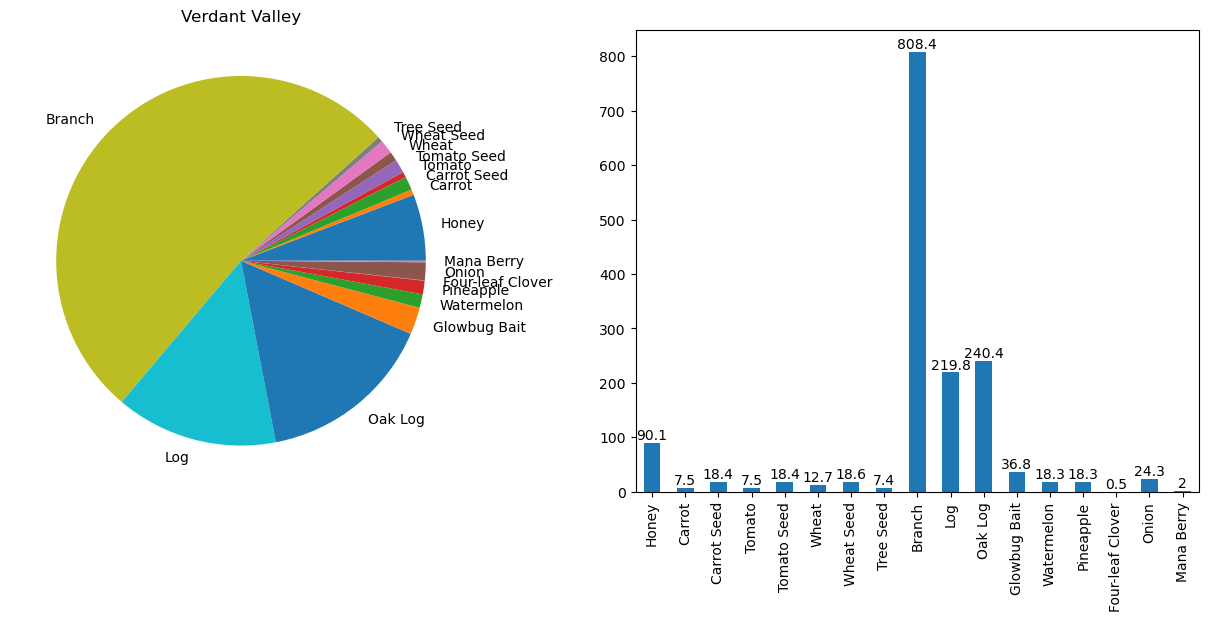

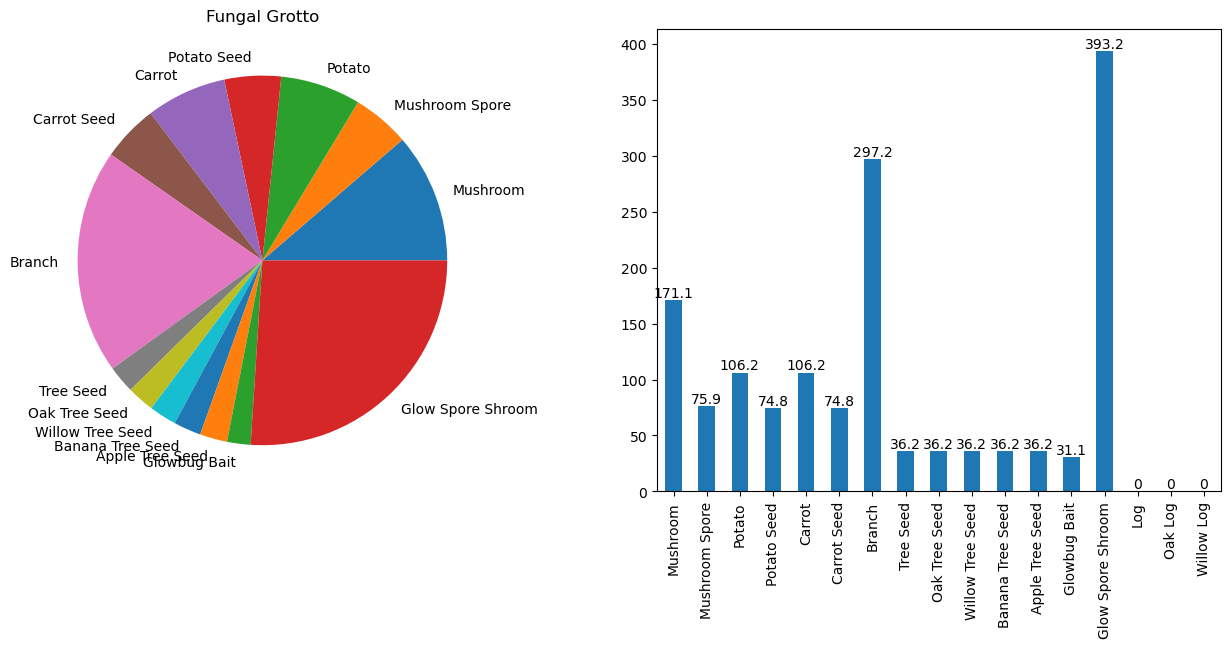

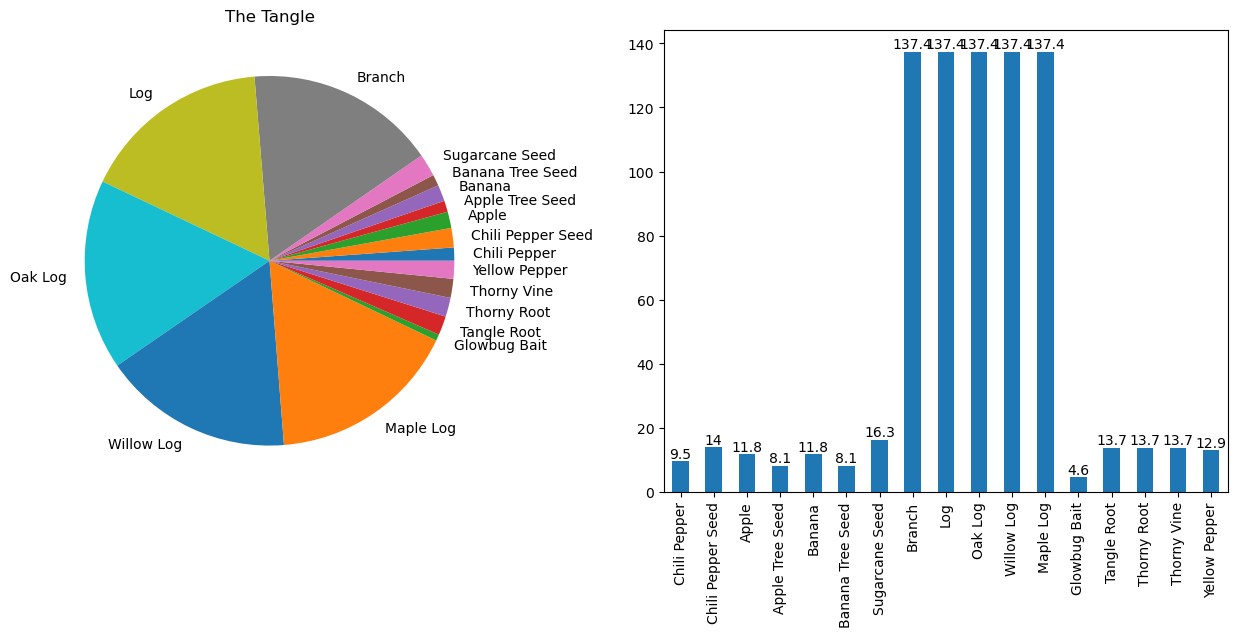

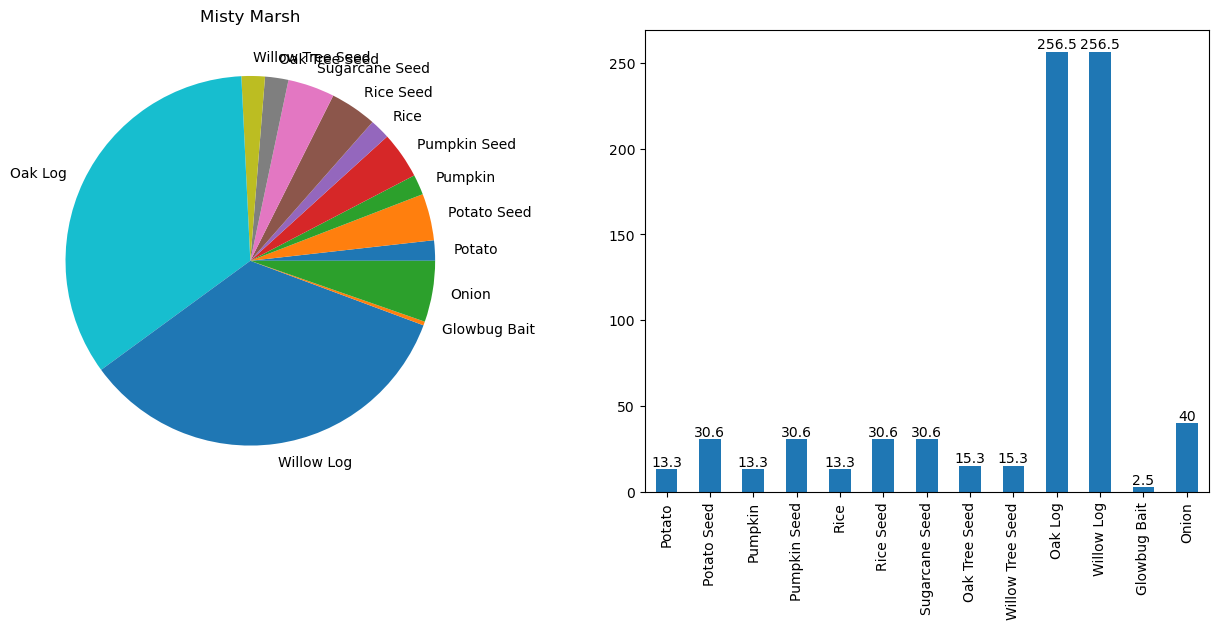

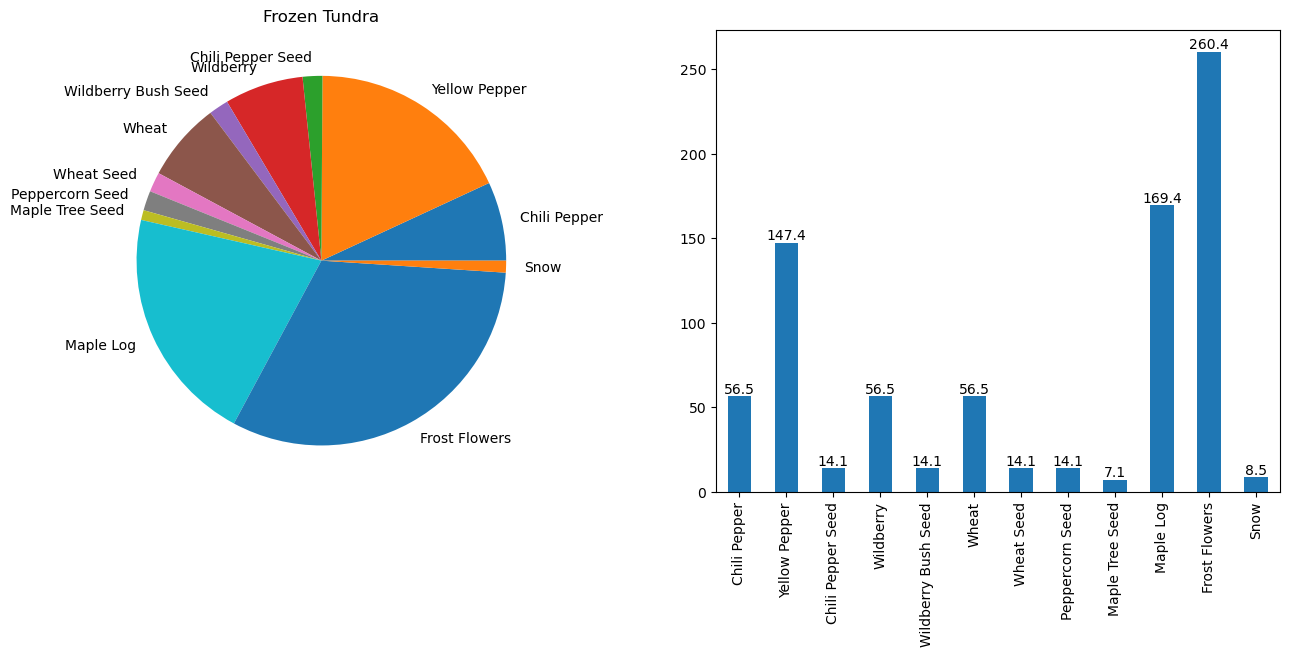

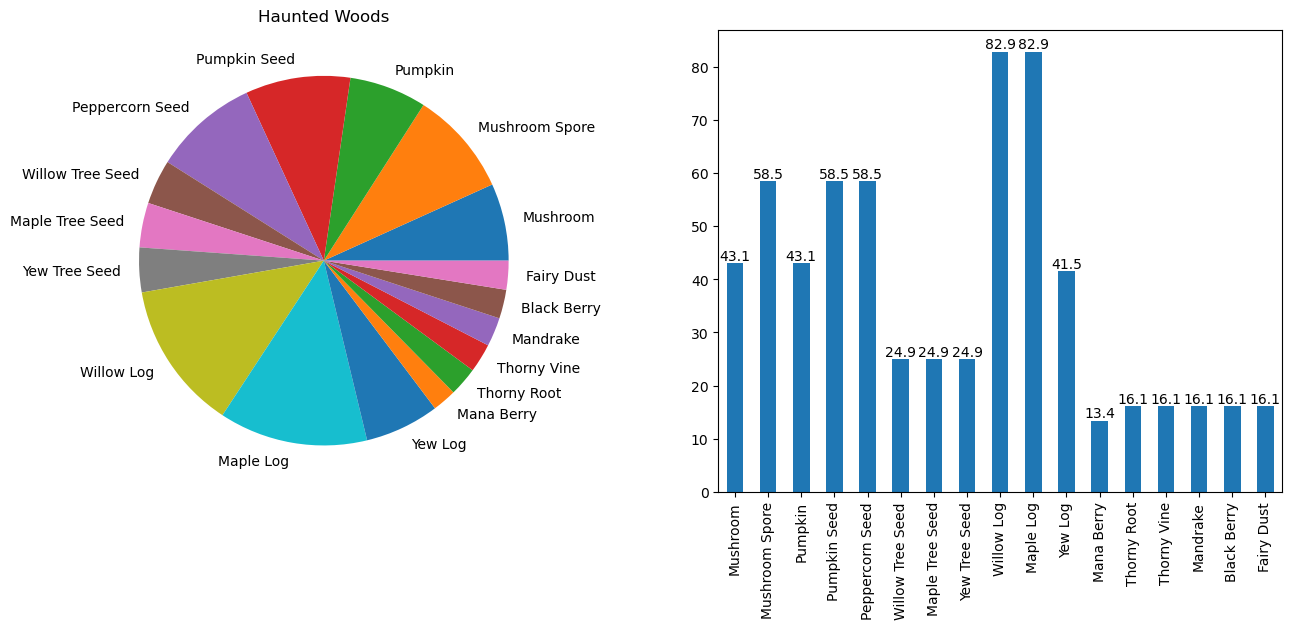

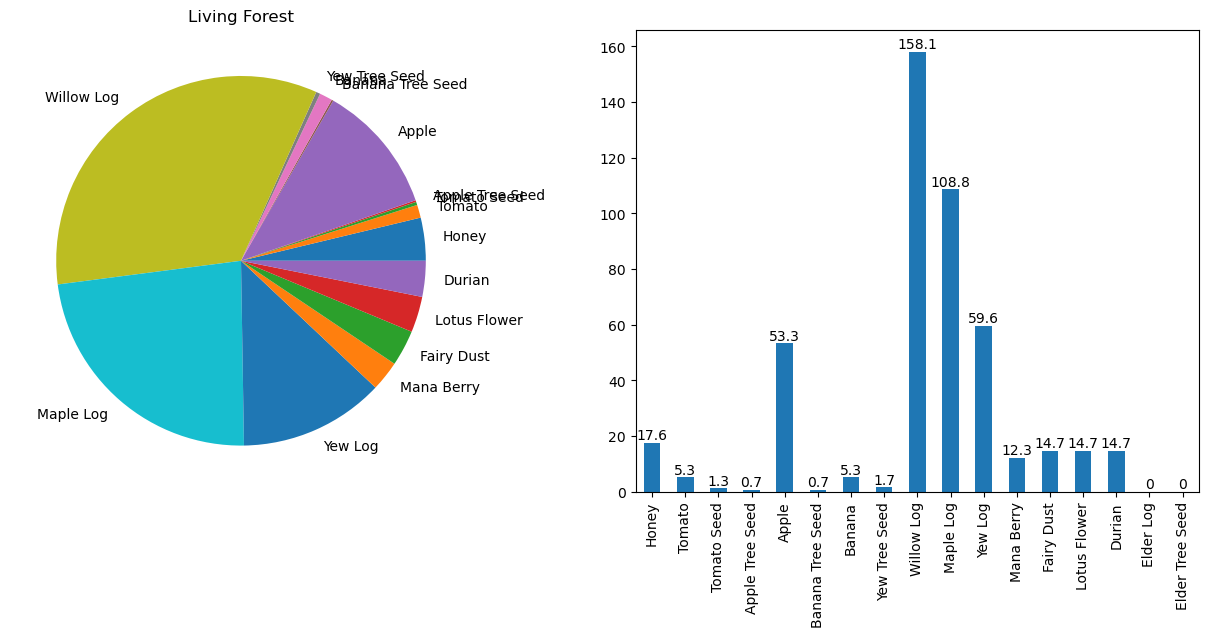

In [4]:
action_summary(foraging)

,Shallow Pond,Lazy River,Still Lake,Open Ocean,Stormy Seas
Raw Shrimp,285.0,0.0,0.0,0.0,0.0
Raw Anchovy,139.0,0.0,0.0,0.0,0.0
Raw Magnetic Minnow,27.2,29.9,16.9,0.0,0.0
Seaweed,44.3,17.9,10.9,10.7,0.0
Aqueous Grass,42.7,28.5,19.7,9.9,0.0
Rotten Driftwood,33.9,26.6,8.4,13.8,0.0
Water Weeds,13.2,39.1,17.6,9.9,0.0
Raw Trout,0.0,166.5,0.0,0.0,0.0
Raw Salmon,0.0,146.5,0.0,0.0,0.0
Raw Tigerfish,0.0,6.1,0.0,0.0,0.0


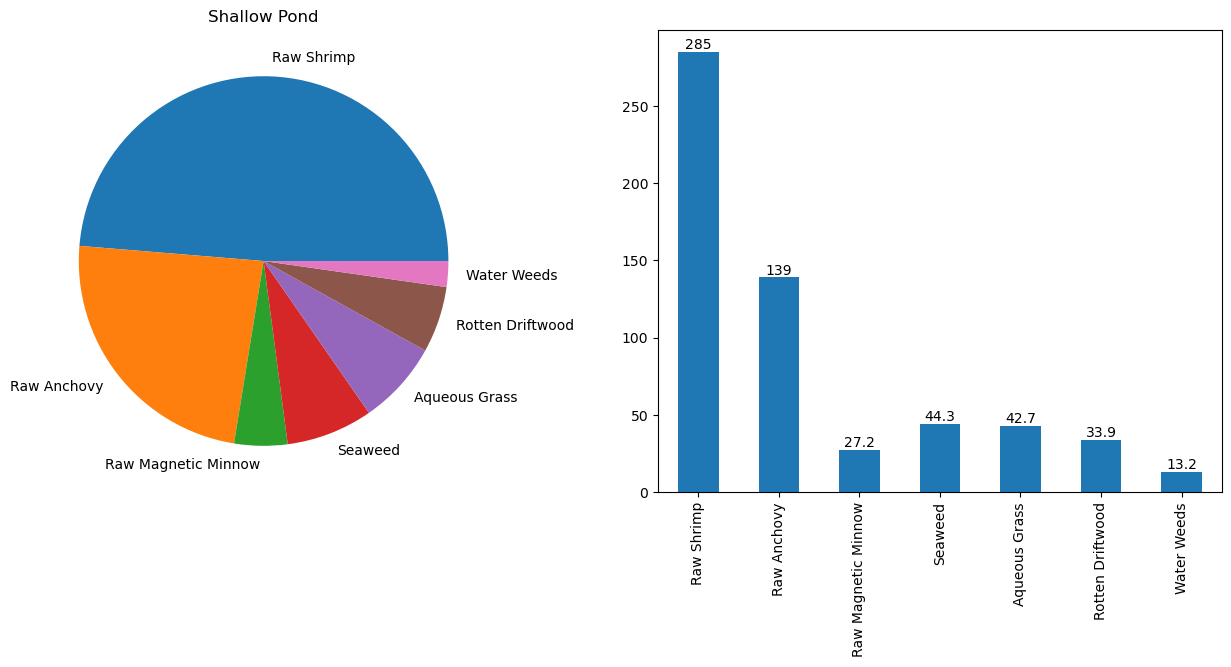

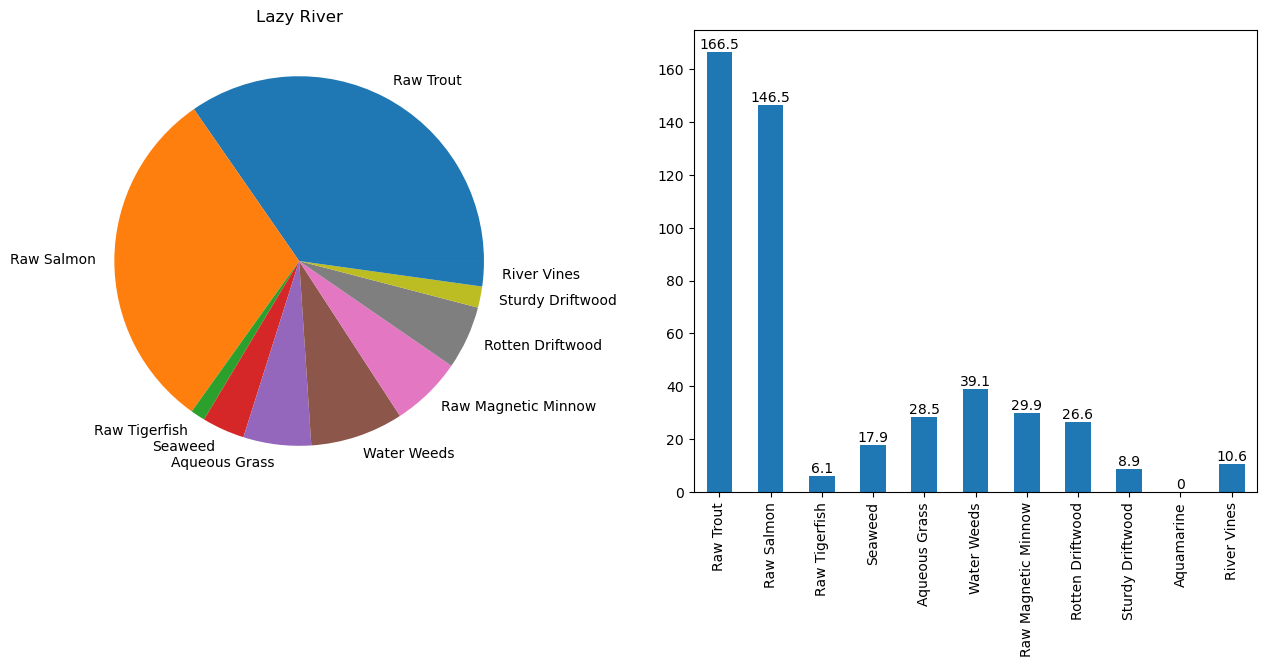

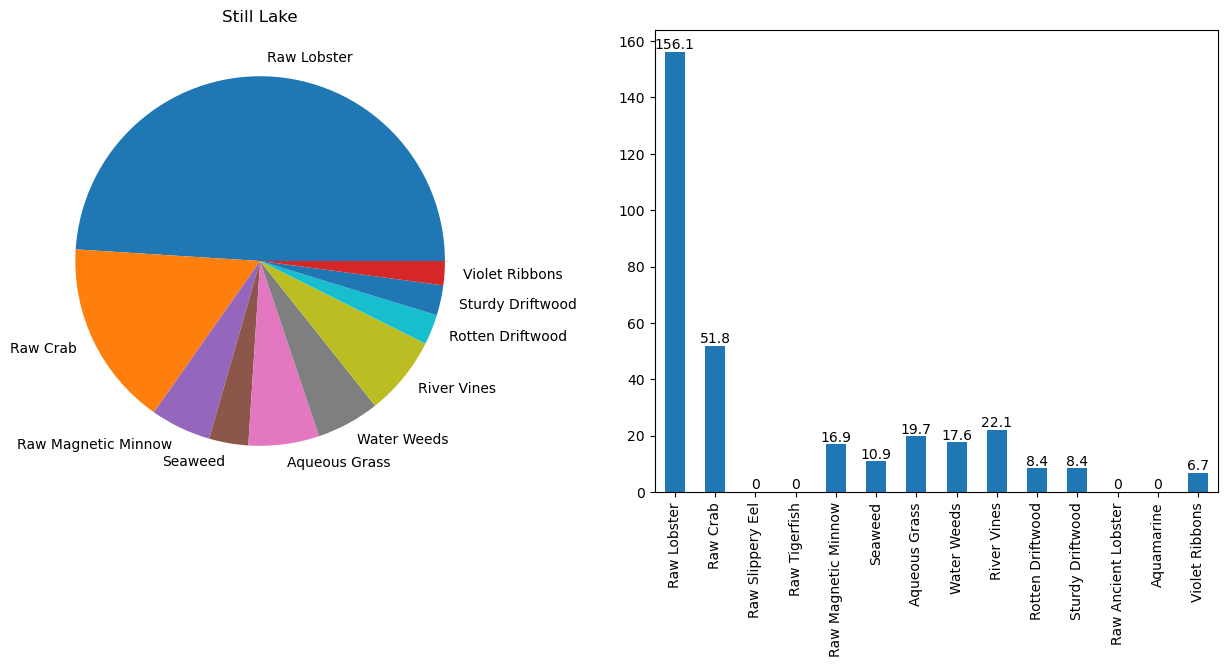

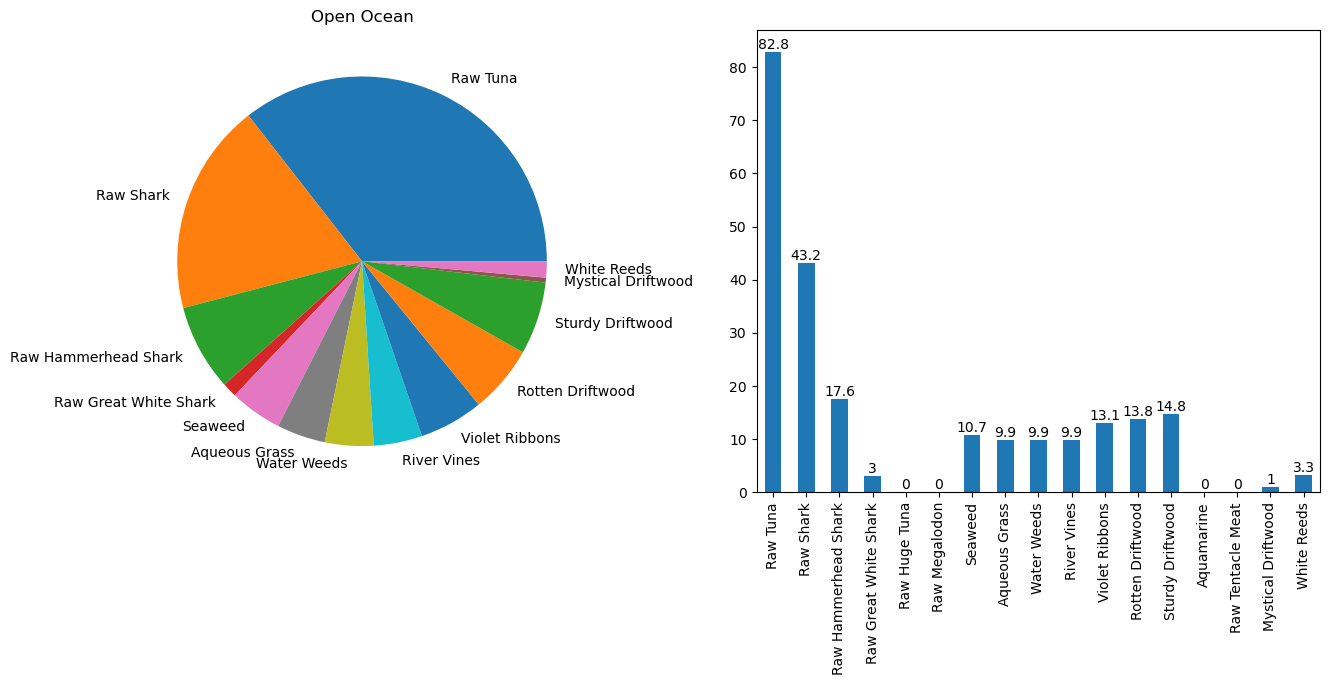

In [5]:
action_summary(fishing)

,Clay Pit,City Outskirts Mine,Village Quarry,Desert Mine,Underground Mine,Hidden Mine,Volcano Mine,Slate Spires,Deep Pit
Clay,737.8,230.6,0.0,33.0,0.0,0.0,0.0,0.0,0.0
Copper Ore,368.9,345.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tin Ore,368.9,345.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stone,184.5,230.6,720.5,0.0,77.6,93.2,0.0,285.2,0.0
Sand,276.7,230.6,0.0,366.2,0.0,0.0,0.0,285.2,0.0
Fat Nightcrawler Bait,18.4,11.5,11.5,0.0,0.0,0.0,0.0,0.0,0.0
Iron Ore,0.0,57.6,576.4,65.9,38.8,0.0,0.0,0.0,0.0
Coal,0.0,57.6,432.3,73.2,38.8,0.0,0.0,0.0,0.0
Mithril Ore,0.0,0.0,0.0,146.5,232.9,62.1,124.2,0.0,0.0
Silver,0.0,0.0,0.0,146.5,97.0,124.2,124.2,0.0,0.0


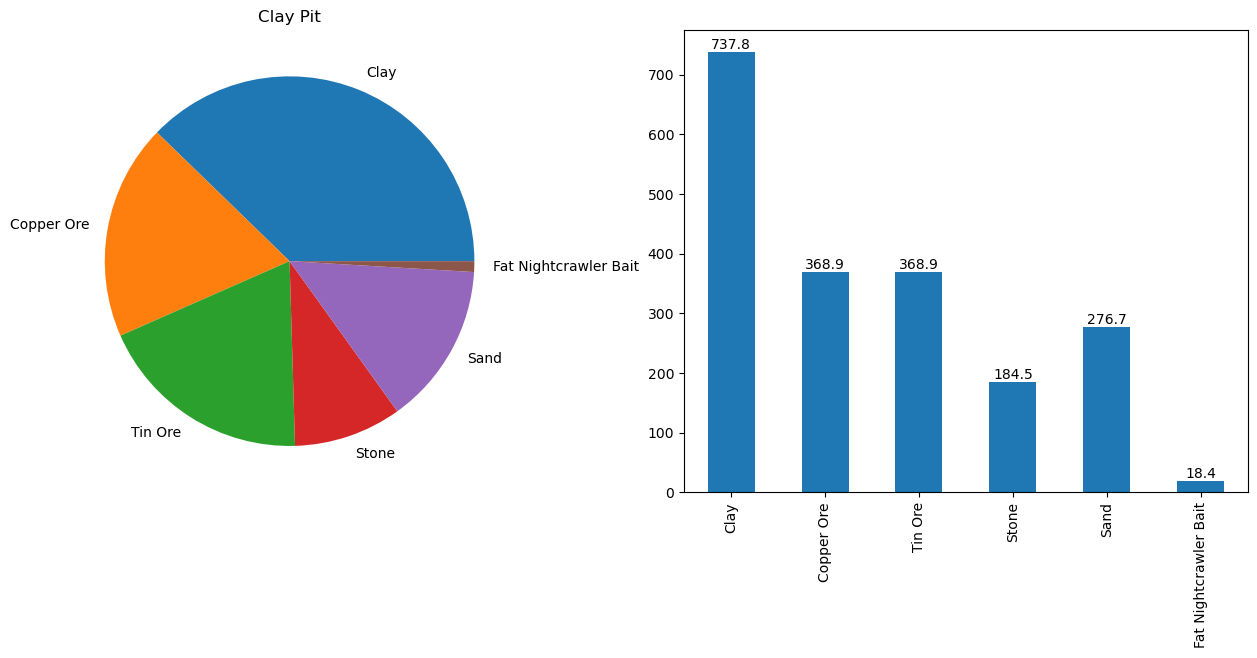

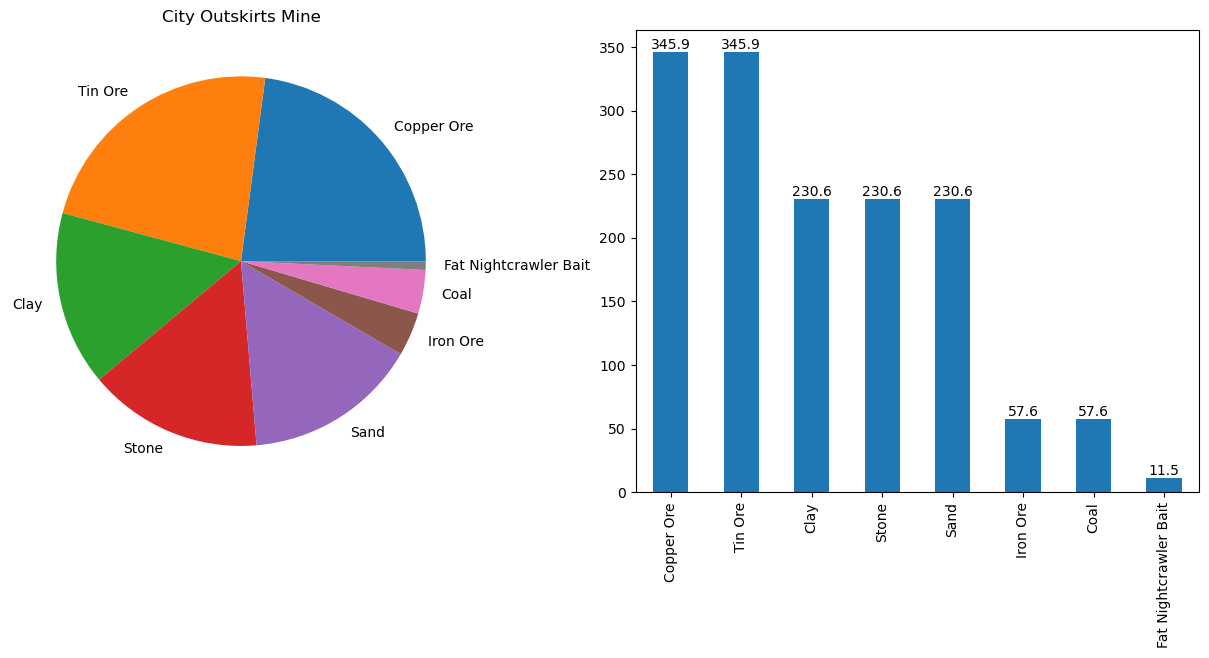

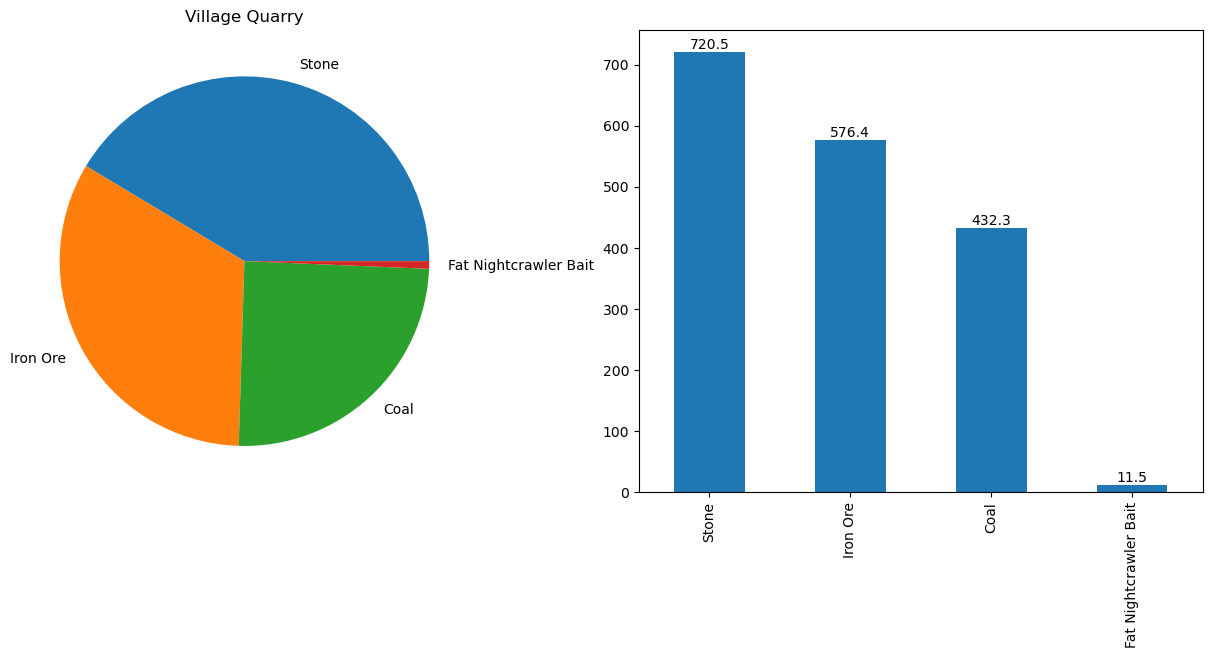

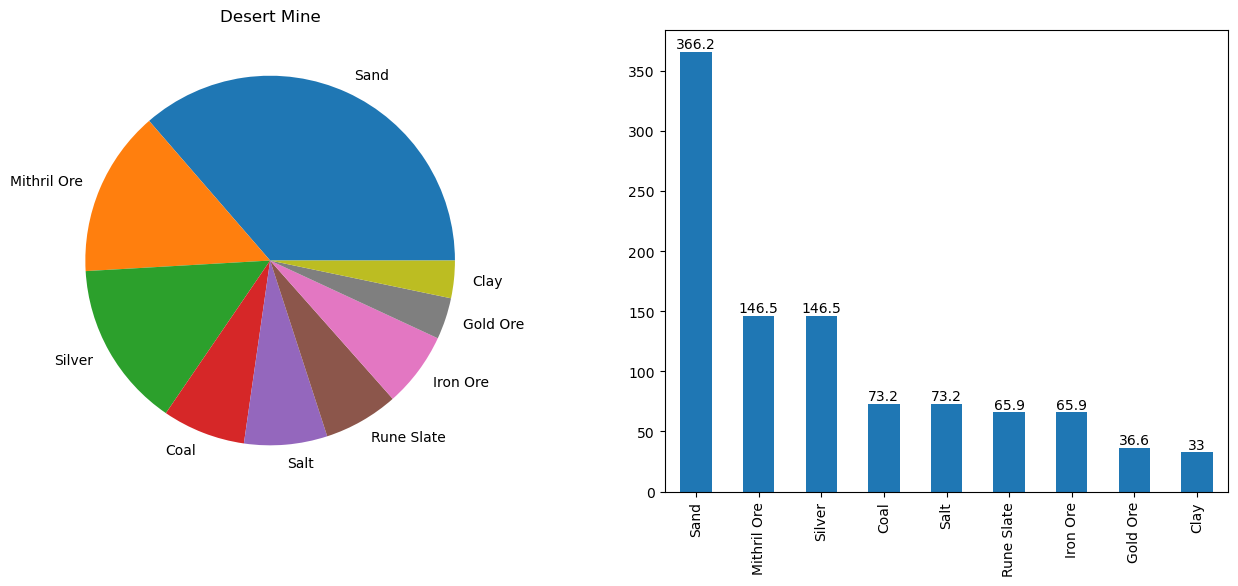

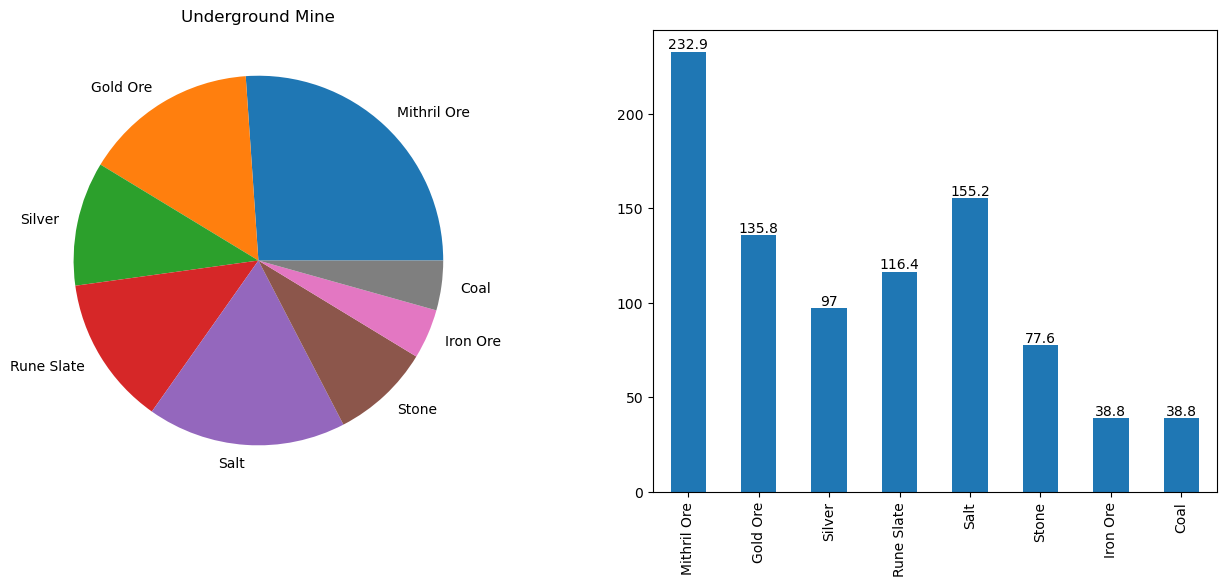

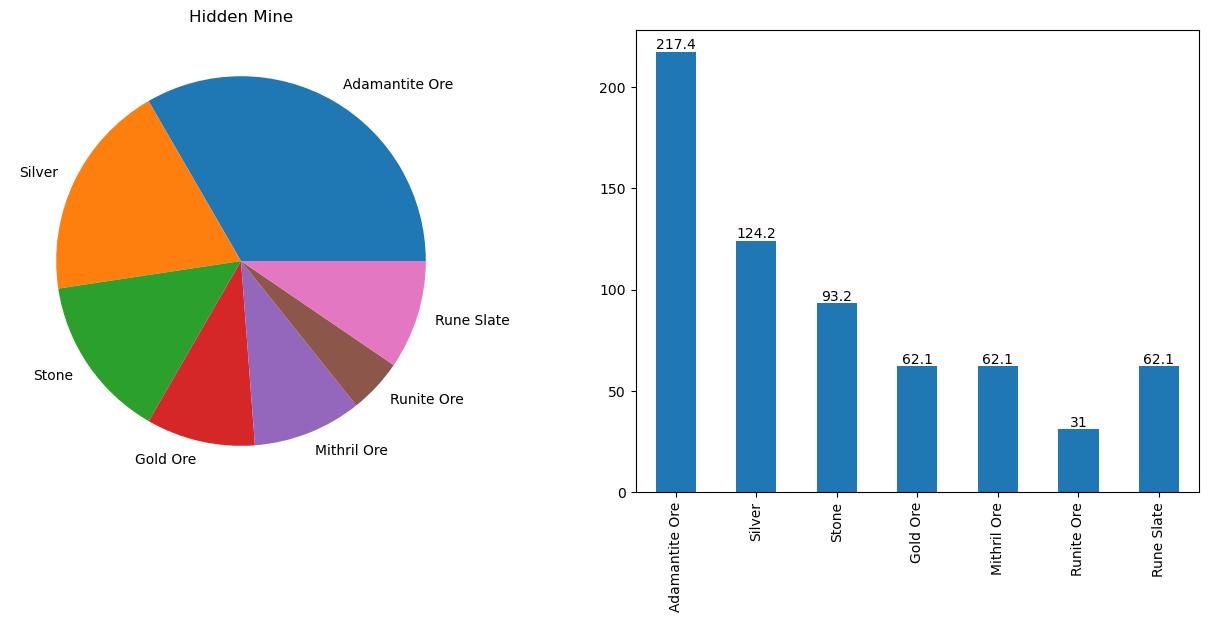

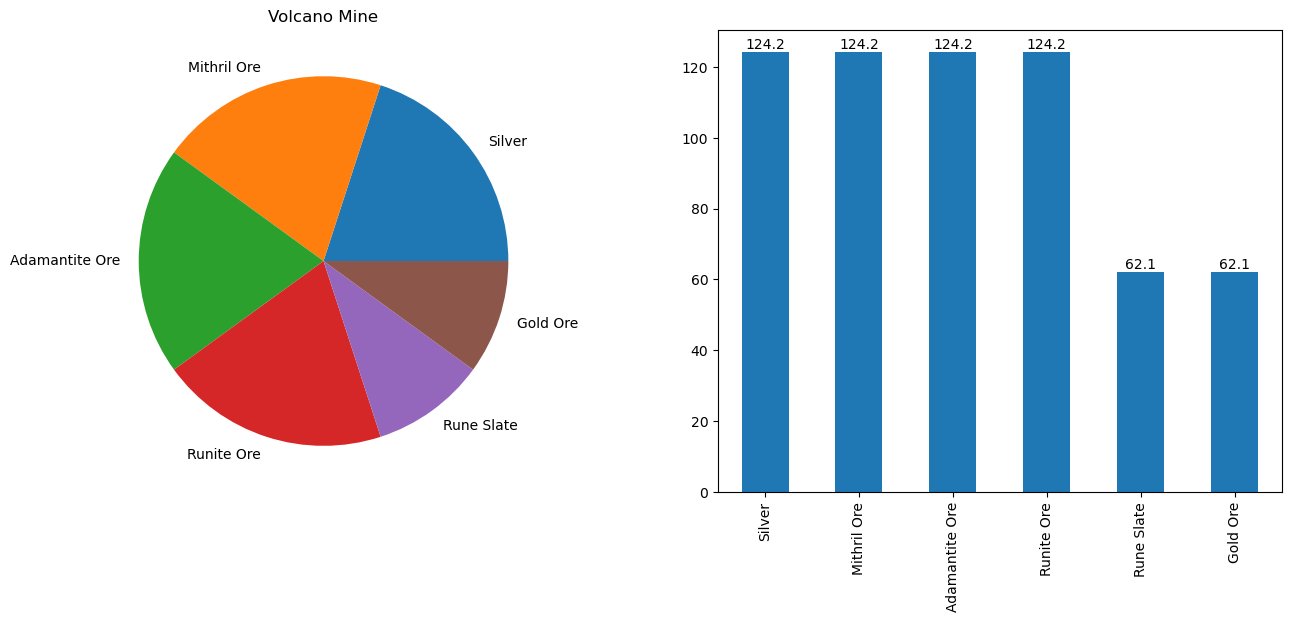

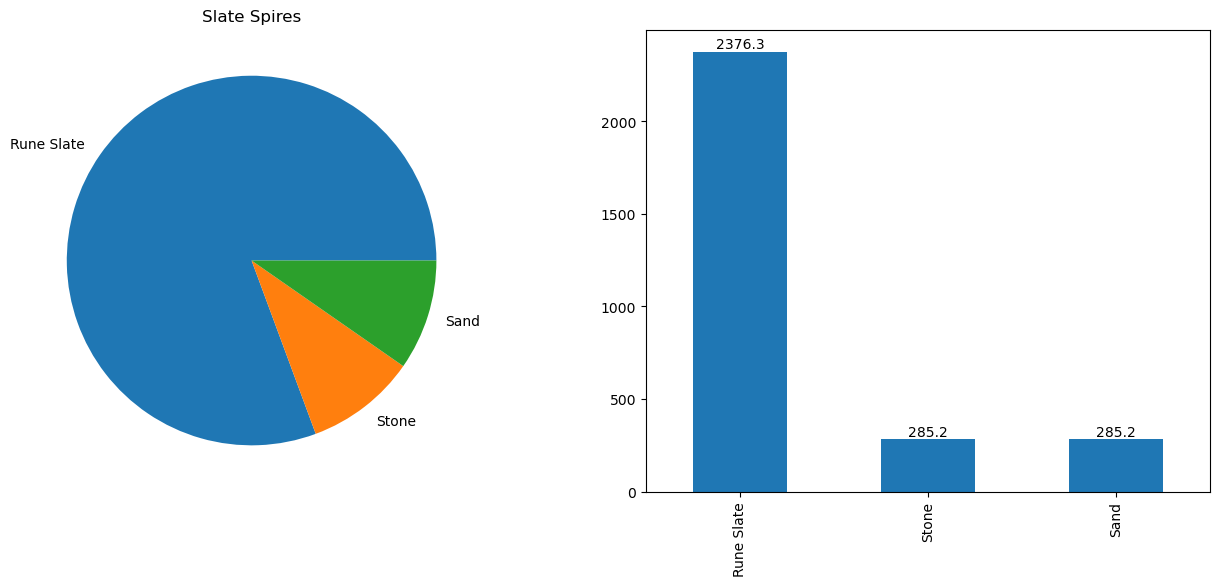

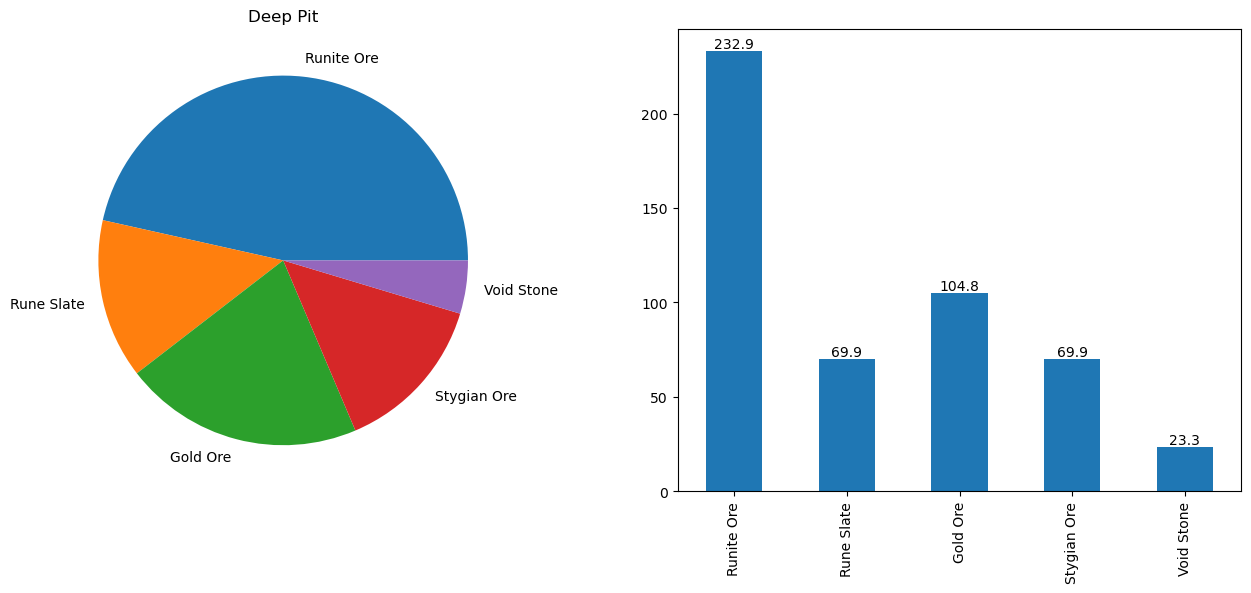

In [6]:
action_summary(mining)